In [1]:
# Using pandas to process data
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

from data_util import parse_bj_aq_data, plot_station, plot_stations, generate_model_data

Using TensorFlow backend.


# 数据解析

In [2]:
bj_aq_data, stations, bj_aq_stations, bj_aq_stations_merged = parse_bj_aq_data()

NaN in PM2.5 is 23459, 6.508615 %
NaN in PM10 is 96175, 26.683406 %
NaN in NO2 is 21720, 6.026135 %
NaN in CO is 46144, 12.802486 %
NaN in O3 is 23732, 6.584358 %
NaN in SO2 is 21664, 6.010598 %
There are 35 air quality stations in Beijing

The stations in Beijing are:
 {'yizhuang_aq', 'tongzhou_aq', 'donggaocun_aq', 'yongdingmennei_aq', 'liulihe_aq', 'guanyuan_aq', 'pinggu_aq', 'huairou_aq', 'qianmen_aq', 'fangshan_aq', 'yanqin_aq', 'aotizhongxin_aq', 'wanshouxigong_aq', 'tiantan_aq', 'miyunshuiku_aq', 'dingling_aq', 'dongsi_aq', 'pingchang_aq', 'fengtaihuayuan_aq', 'yungang_aq', 'mentougou_aq', 'daxing_aq', 'nansanhuan_aq', 'xizhimenbei_aq', 'dongsihuan_aq', 'wanliu_aq', 'miyun_aq', 'yongledian_aq', 'badaling_aq', 'gucheng_aq', 'zhiwuyuan_aq', 'nongzhanguan_aq', 'shunyi_aq', 'yufa_aq', 'beibuxinqu_aq'}


/notebooks/KDD_Cup_2018/data_util.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  bj_aq_station.drop("utc_time", axis=1, inplace=True)
/notebooks/KDD_Cup_2018/data_util.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  bj_aq_station.drop("stationId", axis=1, inplace=True)


In [8]:
# 还有一些特征仍然存在缺失值
bj_aq_stations_merged.isnull().any()

yizhuang_aq_PM2.5          False
yizhuang_aq_PM10           False
yizhuang_aq_NO2            False
yizhuang_aq_CO             False
yizhuang_aq_O3             False
yizhuang_aq_SO2            False
dongsi_aq_PM2.5            False
dongsi_aq_PM10             False
dongsi_aq_NO2              False
dongsi_aq_CO               False
dongsi_aq_O3               False
dongsi_aq_SO2              False
pingchang_aq_PM2.5         False
pingchang_aq_PM10          False
pingchang_aq_NO2           False
pingchang_aq_CO            False
pingchang_aq_O3            False
pingchang_aq_SO2           False
fengtaihuayuan_aq_PM2.5    False
fengtaihuayuan_aq_PM10     False
fengtaihuayuan_aq_NO2      False
fengtaihuayuan_aq_CO       False
fengtaihuayuan_aq_O3       False
fengtaihuayuan_aq_SO2      False
mentougou_aq_PM2.5         False
mentougou_aq_PM10          False
mentougou_aq_NO2           False
mentougou_aq_CO            False
mentougou_aq_O3            False
mentougou_aq_SO2           False
          

In [ ]:
# 在笔记本上取全部数据会内存溢出，这里取了间隔20
X_batches, Y_batches = generate_model_data(bj_aq_stations_merged, 20, 32)

# 可视化

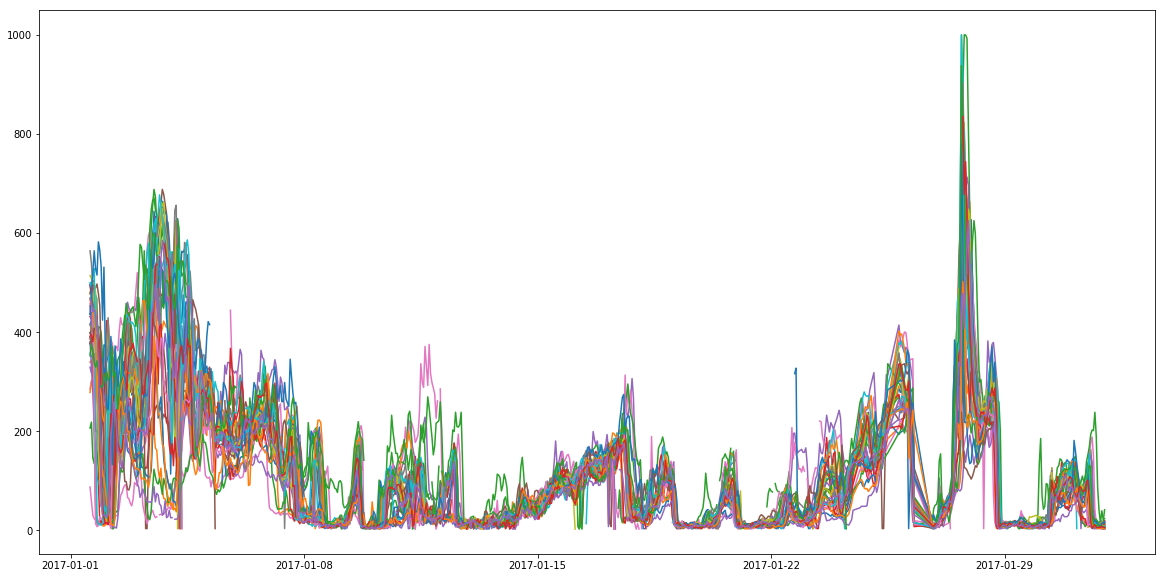

In [7]:
plot_stations(bj_aq_stations, "PM2.5", datetime.datetime(2017,1,1), datetime.datetime(2017,2,1))

# 数据预处理
- 对缺失值进行了补全，使用 ffill